In [6]:
from improc import PGM
import matplotlib.pyplot as plt
import numpy as np

# Figure 3.40

### Loading the file

In [7]:
img_path = "./images/"

pgm3_40 = PGM.read("".join([img_path, "fig-3_40.pgm"]))

#### Defining the Gaussian window

In [8]:
# I thought using the definition of gaussian function, but I couldn't 
# normalize it to fit inside 3x3 area, so I tried to approximate it.
gaussian_w = np.array([
    [1, 1, 1],
    [1, 4, 1],
    [1, 1, 1]
]) / 12

#### Filtering / correcting images

In [9]:
# Original image
pgm3_40_original = pgm3_40.to_ndarray()

# Gaussian blur
pgm3_40_gaussian = pgm3_40.convol(gaussian_w).to_ndarray()

# Unsharp = Original - blurred
pgm3_40_unsharp_mask = pgm3_40_original - pgm3_40_gaussian

# Applying unsharp mask to original. Changing the scale to the original
pgm3_40_unsharp_used = pgm3_40_original - pgm3_40_unsharp_mask

# High boost image. f_hb(x,y) = k * f_original(x,y) - f_unsharp(x,y)
k = 2 # This is the factor of the original. Value is arbitrary
pgm3_40_high_boost = k * pgm3_40_original - pgm3_40_unsharp_mask

# I don't know if I'm doing this part right, but the result image of high boost
# has values greater than 255, so I thought I need to normalize it to 255.
max_highboost = pgm3_40_high_boost.max()    # Greater than 255
maxval = pgm3_40_original.max()             # 255

# Normalized to 255
pgm3_40_high_boost = pgm3_40_high_boost * maxval / max_highboost

#### Plotting

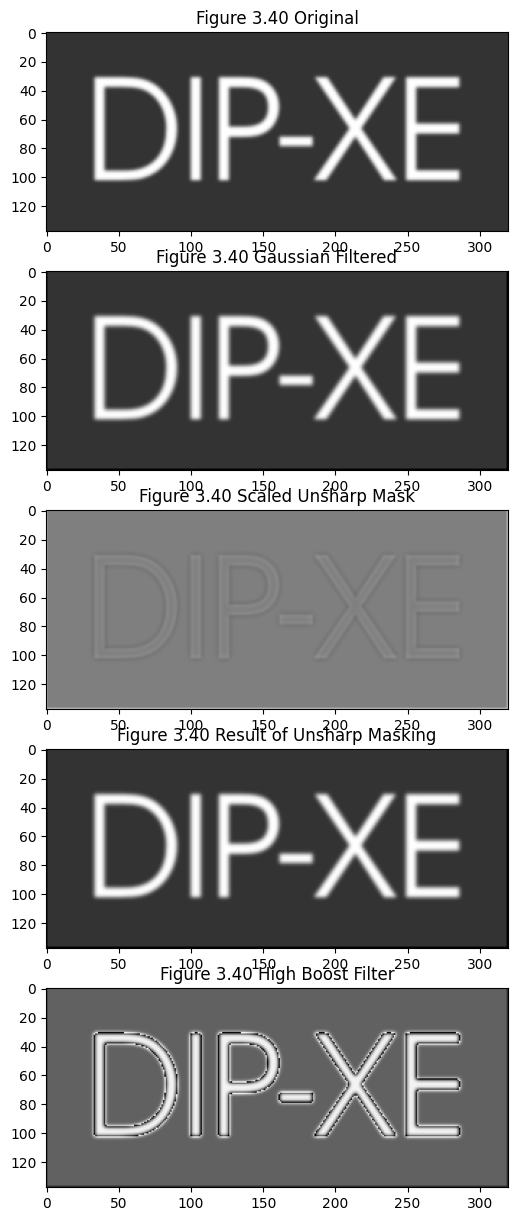

In [10]:
plt.figure(figsize=(15, 15))

plt.subplot(5, 1, 1)
plt.imshow(pgm3_40_original, cmap="gray", vmin=0, vmax=255)
plt.title('Figure 3.40 Original')

plt.subplot(5, 1, 2)
plt.imshow(pgm3_40_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title('Figure 3.40 Gaussian Filtered')

plt.subplot(5, 1, 3)
plt.imshow(pgm3_40_unsharp_mask + 127, cmap="gray", vmin=0, vmax=255) # +127 for scaling.
plt.title('Figure 3.40 Scaled Unsharp Mask')

plt.subplot(5, 1, 4)
plt.imshow(pgm3_40_unsharp_used, cmap="gray", vmin=0, vmax=255)
plt.title('Figure 3.40 Result of Unsharp Masking')

plt.subplot(5, 1, 5)
plt.imshow(pgm3_40_high_boost, cmap="gray", vmin=0, vmax=255)
plt.title('Figure 3.40 High Boost Filter')

plt.show()